In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
codes = ['252670','251340']
price = []

for code in codes:
    url = 'https://finance.naver.com/item/main.nhn?code='+code
    req = requests.get(url)
    html =  req.text
    soup = BeautifulSoup(html, 'html.parser')
    title = soup.select_one("#middle > div.h_company > div.wrap_company > h2 > a")
    today = soup.select_one('div > p.no_today > em > span.blind')
    # print(today)
    price.append([title.get_text(),today.get_text()])
    
print(price)

[['KODEX 200선물인버스2X', '3,075'], ['KODEX 코스닥150선물인버스', '4,935']]


In [6]:
def hollys_store(result):
    
    for page in range(1,10):
        url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store='%page
        req = requests.get(url)
        html = req.text
        soup = BeautifulSoup(html,'html.parser')
        # store = soup.find('table', class_='tb_store')
        store = soup.select_one('#contents > div.content > fieldset > fieldset > div.tableType01 > table > tbody')
        # print(store)
        for td in store.select('tr'):
            
            tds = td.select('td')
            # print(tds)
            result.append([tds[1].get_text(), tds[0].get_text(), tds[3].get_text(), tds[-1].get_text()])
            # try:
            # except:
            #     pass
    return pd.DataFrame(result, columns=['store', 'sido-gu','add','phone'])

result = []

print(hollys_store(result))
    

          store sido-gu                                             add  \
0          종각역점  서울 종로구                    서울특별시 종로구 종로 60-1 종로2가 102-3   
1   부산아트몰링영풍문고점  부산 사하구             부산광역시 사하구 낙동남로 1413 (하단동, 아트몰링) 13층   
2       광명GIDC점  경기 광명시         경기도 광명시 일직로 43 일직동 514 지하2층 G249, G250호   
3           이천점  경기 이천시                  경기도 이천시 어재연로 35 (창전동) 1~3층 할리스   
4       미사가로수길점  경기 하남시      경기도 하남시 미사강변한강로 295 (망월동, 하남미사롯데캐슬헤븐시티Ⅱ) .   
..          ...     ...                                             ...   
85         개화산점  서울 강서구              서울특별시 강서구 양천로 28 (방화동, 벽산에어트리움) 1층   
86      울산달동DT점   울산 남구                 울산광역시 남구 번영로 82 (달동 1297-1) 할리스   
87       송도학원가점  인천 연수구                     인천광역시 연수구 신송로 168 송도동 20-13   
88        인천당하점   인천 서구                 인천광역시 서구 서곶로 788 (당하동, 홀리랜드) 1층   
89        시흥은계점  경기 시흥시  경기도 시흥시 은계번영길 13 (은행동, 아리테타워) 107,108,203~205호   

           phone  
0    02-736-3399  
1   051-201-0621  
2   02-6914-6550  
3   031-635-6655  
4   

In [7]:
url = 'https://movie.daum.net/ranking/reservation'

req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')

posters = soup.select_one('#mainContent > div > div.box_ranking > ol')
for poster in posters.select('li'):
    title = poster.select_one('strong.tit_item > a').get_text()
    rate = poster.select('span.txt_append > span.info_txt')[0].get_text()
    reservationrate = poster.select('span.txt_append > span.info_txt')[1].get_text()
    print(title, rate, reservationrate)



미니언즈2 평점8.9 예매율27.2%
외계+인 1부 평점7.1 예매율25.1%
탑건: 매버릭 평점9.4 예매율14.8%
한산: 용의 출현 평점8.1 예매율14.0%
헤어질 결심 평점8.1 예매율4.6%
명탐정 코난: 할로윈의 신부 평점8.3 예매율3.2%
비상선언 평점8.5 예매율2.8%
토르: 러브 앤 썬더 평점5.2 예매율2.5%
비욘드 라이브 더 무비 : 엑소의 사다리 타고 세계여행3 평점7.8 예매율0.9%
썸머 필름을 타고! 평점8.7 예매율0.8%
엘비스 평점8.6 예매율0.5%
뽀로로 극장판 드래곤캐슬 대모험 평점6.4 예매율0.5%
멘 평점5.9 예매율0.4%
그레이 맨 평점8.1 예매율0.3%
뒤틀린 집 평점8.0 예매율0.3%
아이를 위한 아이 평점8.7 예매율0.3%
범죄도시2 평점8.3 예매율0.2%
로스트 도터 평점8.8 예매율0.1%
더 킬러: 죽어도 되는 아이 평점7.5 예매율0.1%
체리마호: 30살까지 동정이면 마법사가 될 수 있대 평점9.1 예매율0.1%


In [8]:
ols = soup.find('ol', class_='list_movieranking')
rankcount = ols.find_all('div', class_="thumb_cont")


for i in rankcount:
    moviename = i.find('a', class_="link_txt").get_text()
    movierate = i.find('span', class_="txt_grade").get_text()
    reservrate = i.find('span', class_="txt_num").get_text()
    print(moviename, movierate, reservrate)

미니언즈2 8.9 27.2%
외계+인 1부 7.1 25.1%
탑건: 매버릭 9.4 14.8%
한산: 용의 출현 8.1 14.0%
헤어질 결심 8.1 4.6%
명탐정 코난: 할로윈의 신부 8.3 3.2%
비상선언 8.5 2.8%
토르: 러브 앤 썬더 5.2 2.5%
비욘드 라이브 더 무비 : 엑소의 사다리 타고 세계여행3 7.8 0.9%
썸머 필름을 타고! 8.7 0.8%
엘비스 8.6 0.5%
뽀로로 극장판 드래곤캐슬 대모험 6.4 0.5%
멘 5.9 0.4%
그레이 맨 8.1 0.3%
뒤틀린 집 8.0 0.3%
아이를 위한 아이 8.7 0.3%
범죄도시2 8.3 0.2%
로스트 도터 8.8 0.1%
더 킬러: 죽어도 되는 아이 7.5 0.1%
체리마호: 30살까지 동정이면 마법사가 될 수 있대 9.1 0.1%


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


req = requests.get('http://www.weather.go.kr/weather/observation/currentweather.jsp')
soup = BeautifulSoup(req.text,'html.parser')
trs = soup.select("#weather_table > tbody > tr")

result = []

for td in trs:
    region = td.select_one('td:nth-of-type(1)').get_text()
    temper = td.select_one('td:nth-of-type(7)').get_text()
    humid = td.select_one('td:nth-of-type(9)').get_text()
    result.append([region, temper, humid])
    
df = pd.DataFrame(result, columns=['region', 'temperture','humid'])
print(df)
df.to_csv('./csv/temperture.csv')

   region temperture humid
0      강릉       21.5  14.7
1     강진군       20.7      
2      강화       22.4      
3      거제       18.1      
4      거창       18.0   0.0
..    ...        ...   ...
74    함양군       21.2      
75     합천       16.6      
76     해남       22.0      
77     홍성       20.1      
78     홍천       20.1   1.4

[79 rows x 3 columns]


In [10]:
import pandas as pd
df = pd.read_csv('./csv/temperture.csv', index_col="region")

# 행 추출
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산','울산']]
print(city_df)

KeyError: "['대구', '광주'] not in index"

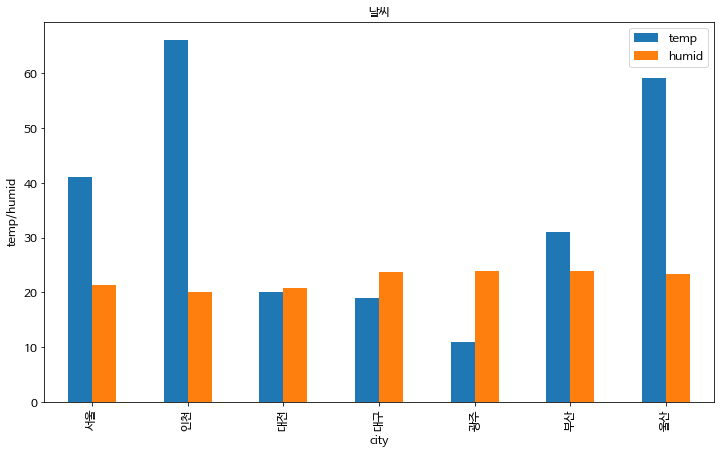

In [ ]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.pyplot as plt

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\NanumBarunGothic.ttf').get_name()
mpl.rc('font', family=font_name)
ax = city_df.plot(kind='bar', title='날씨', figsize=(12,7), legend=True , fontsize=12)
ax.set_xlabel('city', fontsize=12)
ax.set_ylabel('temp/humid', fontsize=12)
ax.legend(['temp', 'humid'], fontsize=12)
plt.show()




## Selenium


In [2]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By

path = 'D:\\program_files\\chromedriver_win32\\chromedriver.exe'
options = wd.ChromeOptions()
options.add_experimental_option('excludeSwitches',['enable-logging'])
driver = wd.Chrome(path, options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_13556\1845080122.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome(path, options=options)


In [ ]:
driver.get('https://naver.com')

driver.find_element(By.ID, 'query').send_keys('python')
driver.find_element(By.ID, 'search_btn').click()

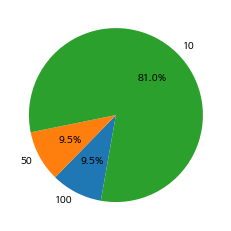

In [ ]:
driver.get('https://www.youtube.com/c/paikscuisine/videos')

page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')
all_videos = soup.find_all(id='dismissible')
# print(all_videos)
driver.refresh()
datas = []
for i in all_videos:
    title = i.find(id='video-title').get_text()
    views = i.select_one("#metadata-line > span:nth-of-type(1)").get_text()
    datas.append([title, views])
    
df = pd.DataFrame(datas, columns=['title', 'views'])
# print(df)

df.to_csv('./csv/youtube.csv', mode='w', encoding='utf-8-sig', index=True)
dict_youtube = {'100' : 0, '50' : 0, '10' : 0}
for item in datas:
    count = float(item[1].split('조회수')[1].split('만회')[0].strip())
    if  count > 100:
        dict_youtube['100'] += 1
    elif count > 50:
        dict_youtube['50'] += 1
    elif count > 10:
        dict_youtube['10'] += 1
# print(dict_youtube)

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\NanumBarunGothic.ttf').get_name()
mpl.rc('font', family=font_name)

plt.pie(dict_youtube.values(), labels=dict_youtube.keys(), autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

    


In [45]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import re

path = 'D:\\program_files\\chromedriver_win32\\chromedriver.exe'
driver = webdriver.Chrome(path)
driver.implicitly_wait(10)
driver.get('https://www.melon.com/chart/index.htm')

# tobdy = driver.find_element(By.XPATH,'/html/body/div/div[3]/div/div/div[3]/form/div/table/tbody')
tbody = driver.find_element(By.XPATH,'//*[@id="frm"]/div/table/tbody')
trs = tbody.find_elements(By.TAG_NAME,'tr')
top100 = []

for tr in trs:
    # for td in tr.find_elements(By.TAG_NAME,'td'):
    rank = tr.find_element(By.CLASS_NAME,'rank').text
    title = tr.find_element(By.CLASS_NAME,'wrap_song_info').find_element(By.TAG_NAME,'a').text
    singer = tr.find_element(By.CSS_SELECTOR,'div.rank02').find_element(By.TAG_NAME,'a').text
    album = tr.find_element(By.CSS_SELECTOR,'div.rank03').find_element(By.TAG_NAME,'a').text
    likes = tr.find_element(By.CLASS_NAME,'like').find_element(By.CLASS_NAME,'cnt').text
    likes = re.sub(',',"",likes)
    top100.append([rank, title,singer, album, likes])
    
with open('./csv/melon100.csv', 'w', encoding='utf-8-sig') as file:
    file.write('rank,title,singer,album, likes\n')
    for item in top100:
        row = ','.join(item)
        file.write(row + '\n')



C:\Users\admin\AppData\Local\Temp\ipykernel_13556\2477973728.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [44]:
page = driver.page_source
soup = BeautifulSoup(page, 'html.parser')
print(soup.select_one('#lst50 > td:nth-child(8) > div > button > span.cnt').get_text())


총건수
71,830
